In [19]:
import pandas as pd

# Load your data
df = pd.read_csv('./20100056.csv')  # Replace with your actual file path

# Display unique values for each column
for column in df.columns:
    print(f"\n{column}:")
    print(df[column].unique())
    print("-" * 50)


REF_DATE:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '2024-10' '2024-11' '2024-12' '2025-01' '2025

In [20]:
# Keep only the specified columns
columns_to_keep = [
    'REF_DATE', 
    'GEO', 
    'DGUID', 
    'North American Industry Classification System (NAICS)', 
    'Sales', 
    'Adjustments', 
    'UOM', 
    'UOM_ID', 
    'SCALAR_FACTOR', 
    'SCALAR_ID', 
    'VECTOR', 
    'COORDINATE', 
    'VALUE'
]

df_filtered = df[columns_to_keep].copy()


# Filter GEO column - remove 'Canada'
df_filtered = df_filtered[df_filtered['GEO'] != 'Canada']


# Filter NAICS column - keep only specified retail categories
naics_to_keep = [
    'Retail trade [44-45]',
    'Food and beverage retailers [445]',
    'Grocery and convenience retailers [4451]',
    'Clothing and clothing accessories retailers [4581]',
    'Shoe retailers [4582]'
]

df_filtered = df_filtered[df_filtered['North American Industry Classification System (NAICS)'].isin(naics_to_keep)]


# Filter Adjustments column - keep only 'Unadjusted'
df_filtered = df_filtered[df_filtered['Adjustments'] == 'Unadjusted']


In [21]:
df_filtered

,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Sales,Adjustments,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE
60,2017-01,Newfoundland and Labrador,2021A000210,Retail trade [44-45],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446859542,2.1.1.1,618230.0
69,2017-01,Newfoundland and Labrador,2021A000210,Food and beverage retailers [445],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446859551,2.9.1.1,148298.0
70,2017-01,Newfoundland and Labrador,2021A000210,Grocery and convenience retailers [4451],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446859552,2.10.1.1,129572.0
84,2017-01,Newfoundland and Labrador,2021A000210,Clothing and clothing accessories retailers [4...,Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446859566,2.24.1.1,10758.0
85,2017-01,Newfoundland and Labrador,2021A000210,Shoe retailers [4582],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446859567,2.25.1.1,1080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69071,2025-04,Nunavut,2021A000262,Retail trade [44-45],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446860187,23.1.1.1,70148.0
69080,2025-04,Nunavut,2021A000262,Food and beverage retailers [445],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446860196,23.9.1.1,46022.0
69081,2025-04,Nunavut,2021A000262,Grocery and convenience retailers [4451],Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446860197,23.10.1.1,NaN
69095,2025-04,Nunavut,2021A000262,Clothing and clothing accessories retailers [4...,Total retail sales,Unadjusted,Dollars,81,thousands,3,v1446860211,23.24.1.1,NaN


In [22]:
from datetime import datetime

# Canadian Holiday Data (2017-2025)
def create_holiday_dataset():
    
    holidays = []
    
    # Years to generate
    years = range(2017, 2026)
    
    for year in years:
        # Add fixed national holidays
        holidays.append({
            'date': f"{year}-01-01",
            'holiday': "New Year's Day",
            'type': 'National',
            'provinces': 'All'
        })
        
        holidays.append({
            'date': f"{year}-07-01",
            'holiday': "Canada Day", 
            'type': 'National',
            'provinces': 'All'
        })
        
        holidays.append({
            'date': f"{year}-12-25",
            'holiday': "Christmas Day",
            'type': 'National', 
            'provinces': 'All'
        })
        
        holidays.append({
            'date': f"{year}-12-26",
            'holiday': "Boxing Day",
            'type': 'Federal',
            'provinces': 'Federal + ON, NL'
        })
        
        # Add variable date holidays
        
        # Good Friday (Friday before Easter)
        easter_dates = {
            2017: "04-14", 2018: "03-30", 2019: "04-19", 2020: "04-10",
            2021: "04-02", 2022: "04-15", 2023: "04-07", 2024: "03-29", 2025: "04-18"
        }
        if year in easter_dates:
            holidays.append({
                'date': f"{year}-{easter_dates[year]}",
                'holiday': "Good Friday",
                'type': 'National',
                'provinces': 'All'
            })
        
        # Labour Day (First Monday in September)
        labour_day_dates = {
            2017: "09-04", 2018: "09-03", 2019: "09-02", 2020: "09-07",
            2021: "09-06", 2022: "09-05", 2023: "09-04", 2024: "09-02", 2025: "09-01"
        }
        if year in labour_day_dates:
            holidays.append({
                'date': f"{year}-{labour_day_dates[year]}",
                'holiday': "Labour Day",
                'type': 'National',
                'provinces': 'All'
            })
        
        # Victoria Day (Monday before May 25)
        victoria_day_dates = {
            2017: "05-22", 2018: "05-21", 2019: "05-20", 2020: "05-18",
            2021: "05-24", 2022: "05-23", 2023: "05-22", 2024: "05-20", 2025: "05-19"
        }
        if year in victoria_day_dates:
            holidays.append({
                'date': f"{year}-{victoria_day_dates[year]}",
                'holiday': "Victoria Day",
                'type': 'Federal',
                'provinces': 'All except QC'
            })
        
        # Thanksgiving (Second Monday in October)
        thanksgiving_dates = {
            2017: "10-09", 2018: "10-08", 2019: "10-14", 2020: "10-12",
            2021: "10-11", 2022: "10-10", 2023: "10-09", 2024: "10-14", 2025: "10-13"
        }
        if year in thanksgiving_dates:
            holidays.append({
                'date': f"{year}-{thanksgiving_dates[year]}",
                'holiday': "Thanksgiving",
                'type': 'Federal',
                'provinces': 'All except NS, NB, PE, NL'
            })
        
        # Family Day (Third Monday in February)
        family_day_dates = {
            2017: "02-20", 2018: "02-19", 2019: "02-18", 2020: "02-17",
            2021: "02-15", 2022: "02-21", 2023: "02-20", 2024: "02-19", 2025: "02-17"
        }
        if year in family_day_dates:
            holidays.append({
                'date': f"{year}-{family_day_dates[year]}",
                'holiday': "Family Day",
                'type': 'Provincial',
                'provinces': 'AB, BC, NB, ON, PE, SK'
            })
        
        # Civic Holiday (First Monday in August)
        civic_holiday_dates = {
            2017: "08-07", 2018: "08-06", 2019: "08-05", 2020: "08-03",
            2021: "08-02", 2022: "08-01", 2023: "08-07", 2024: "08-05", 2025: "08-04"
        }
        if year in civic_holiday_dates:
            holidays.append({
                'date': f"{year}-{civic_holiday_dates[year]}",
                'holiday': "Civic Holiday",
                'type': 'Provincial',
                'provinces': 'Most provinces'
            })
        
        # Saint-Jean-Baptiste Day (Quebec)
        holidays.append({
            'date': f"{year}-06-24",
            'holiday': "Saint-Jean-Baptiste Day",
            'type': 'Provincial',
            'provinces': 'QC'
        })
        
        # Remembrance Day
        holidays.append({
            'date': f"{year}-11-11",
            'holiday': "Remembrance Day",
            'type': 'Provincial',
            'provinces': 'Most provinces except ON, QC, NS, MB'
        })
        
        # National Day for Truth and Reconciliation (since 2021)
        if year >= 2021:
            holidays.append({
                'date': f"{year}-09-30",
                'holiday': "National Day for Truth and Reconciliation",
                'type': 'Federal',
                'provinces': 'Federal + some provinces'
            })
    
    return pd.DataFrame(holidays)

def merge_sales_with_holidays(sales_df, holiday_df):
    
    # Check if VALUE column exists
    if 'VALUE' not in sales_df.columns:
        print("WARNING: VALUE column not found in sales data!")
        return None
    
    # Convert date columns
    sales_df['date'] = pd.to_datetime(sales_df['REF_DATE'])
    holiday_df['date'] = pd.to_datetime(holiday_df['date'])
    
    # Create month-year columns for merging
    sales_df['year_month'] = sales_df['date'].dt.strftime('%Y-%m')
    holiday_df['year_month'] = holiday_df['date'].dt.strftime('%Y-%m')
    
    # Count holidays per month and get holiday details
    holiday_summary = holiday_df.groupby('year_month').agg({
        'holiday': ['count', lambda x: ', '.join(x)],
        'type': lambda x: ', '.join(x.unique())
    })
    
    # Flatten column names
    holiday_summary.columns = ['holiday_count', 'holiday_names', 'holiday_types']
    holiday_summary = holiday_summary.reset_index()
    
    # Merge with sales data
    merged_df = sales_df.merge(holiday_summary, on='year_month', how='left')
    
    # Fill missing values
    merged_df['holiday_count'] = merged_df['holiday_count'].fillna(0)
    merged_df['has_holiday'] = merged_df['holiday_count'] > 0
    merged_df['holiday_names'] = merged_df['holiday_names'].fillna('No holidays')
    merged_df['holiday_types'] = merged_df['holiday_types'].fillna('None')
    
    # Add useful date columns
    merged_df['month'] = merged_df['date'].dt.month
    merged_df['month_name'] = merged_df['date'].dt.strftime('%B')
    merged_df['year'] = merged_df['date'].dt.year
    
    return merged_df

def main(sales_df):
    
    
    # Create holiday dataset
    holiday_df = create_holiday_dataset()
    print(f"Created holiday dataset: {holiday_df.shape[0]} holidays from 2017-2025")
    
    # Merge sales with holidays
    merged_df = merge_sales_with_holidays(sales_df, holiday_df)
    
    if merged_df is None:
        print(" Merge failed due to missing VALUE column")
        return
    
    print(f"✓ Merge successful: {merged_df.shape[0]} rows")

    # Save results
#     merged_df.to_csv('sales_with_holidays.csv', index=False)
#     holiday_df.to_csv('canada_holidays_2017_2025.csv', index=False)

    # Show sample of merged data
    print(f"\n Sample of merged data:")
    sample_cols = ['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 
                   'VALUE', 'has_holiday', 'holiday_count', 'holiday_names']
    available_cols = [col for col in sample_cols if col in merged_df.columns]
    print(merged_df[available_cols].head(10))
    
    return merged_df, holiday_df

# Run the merge
if __name__ == "__main__":
    merged_df, holiday_df = main(df_filtered)

Created holiday dataset: 113 holidays from 2017-2025
✓ Merge successful: 10280 rows

 Sample of merged data:
  REF_DATE                        GEO  \
0  2017-01  Newfoundland and Labrador   
1  2017-01  Newfoundland and Labrador   
2  2017-01  Newfoundland and Labrador   
3  2017-01  Newfoundland and Labrador   
4  2017-01  Newfoundland and Labrador   
5  2017-01       Prince Edward Island   
6  2017-01       Prince Edward Island   
7  2017-01       Prince Edward Island   
8  2017-01       Prince Edward Island   
9  2017-01       Prince Edward Island   

  North American Industry Classification System (NAICS)     VALUE  \
0                               Retail trade [44-45]     618230.0   
1                  Food and beverage retailers [445]     148298.0   
2           Grocery and convenience retailers [4451]     129572.0   
3  Clothing and clothing accessories retailers [4...      10758.0   
4                              Shoe retailers [4582]       1080.0   
5                        

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

def comprehensive_holiday_analysis(merged_df):
    """
    Comprehensive analysis of holiday impact on retail sales
    This will provide all the results you need for your report
    """
    
    print(" COMPREHENSIVE HOLIDAY IMPACT ANALYSIS")
    print("=" * 60)
    
    # 1. DATA OVERVIEW
    print("\n1. DATA OVERVIEW")
    print("-" * 30)
    print(f"Total records: {len(merged_df):,}")
    print(f"Date range: {merged_df['REF_DATE'].min()} to {merged_df['REF_DATE'].max()}")
    print(f"Provinces analyzed: {merged_df['GEO'].nunique()}")
    print(f"Retail categories: {merged_df['North American Industry Classification System (NAICS)'].nunique()}")
    print(f"Months with holidays: {merged_df['has_holiday'].sum():,}")
    print(f"Months without holidays: {(~merged_df['has_holiday']).sum():,}")
    
    # 2. HOLIDAY FREQUENCY ANALYSIS
    print("\n2. HOLIDAY FREQUENCY ANALYSIS")
    print("-" * 30)
    holiday_freq = merged_df.groupby('holiday_count').size()
    print("Distribution of holidays per month:")
    for count, freq in holiday_freq.items():
        print(f"  {count} holidays: {freq:,} months ({freq/len(merged_df)*100:.1f}%)")
    
    # Most common holidays affecting retail
    top_holidays = merged_df[merged_df['has_holiday']]['holiday_names'].value_counts().head(10)
    print(f"\nTop 10 most frequent holiday combinations:")
    for holiday, count in top_holidays.items():
        print(f"  {holiday}: {count:,} occurrences")
    
    # 3. OVERALL HOLIDAY IMPACT
    print("\n3. OVERALL HOLIDAY IMPACT ANALYSIS")
    print("-" * 30)
    
    holiday_sales = merged_df[merged_df['has_holiday']]['VALUE']
    non_holiday_sales = merged_df[~merged_df['has_holiday']]['VALUE']
    
    # Statistical test
    t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)
    
    print(f"Average sales in holiday months: ${holiday_sales.mean():,.0f}k")
    print(f"Average sales in non-holiday months: ${non_holiday_sales.mean():,.0f}k")
    print(f"Absolute difference: ${holiday_sales.mean() - non_holiday_sales.mean():,.0f}k")
    print(f"Percentage difference: {((holiday_sales.mean() - non_holiday_sales.mean()) / non_holiday_sales.mean() * 100):+.2f}%")
    print(f"Statistical significance (t-test): p-value = {p_value:.6f}")
    print(f"Result: {'Statistically significant' if p_value < 0.05 else 'Not statistically significant'}")
    
    # 4. ANALYSIS BY RETAIL CATEGORY
    print("\n 4. RETAIL CATEGORY ANALYSIS")
    print("-" * 30)
    
    category_analysis = []
    for category in merged_df['North American Industry Classification System (NAICS)'].unique():
        cat_data = merged_df[merged_df['North American Industry Classification System (NAICS)'] == category]
        
        cat_holiday = cat_data[cat_data['has_holiday']]['VALUE']
        cat_non_holiday = cat_data[~cat_data['has_holiday']]['VALUE']
        
        if len(cat_holiday) > 0 and len(cat_non_holiday) > 0:
            pct_change = ((cat_holiday.mean() - cat_non_holiday.mean()) / cat_non_holiday.mean() * 100)
            
            # Statistical test for this category
            t_stat_cat, p_val_cat = stats.ttest_ind(cat_holiday, cat_non_holiday)
            
            category_analysis.append({
                'Category': category,
                'Holiday_Avg': cat_holiday.mean(),
                'Non_Holiday_Avg': cat_non_holiday.mean(),
                'Pct_Change': pct_change,
                'P_Value': p_val_cat,
                'Significant': p_val_cat < 0.05
            })
            
            print(f"\n{category}:")
            print(f"  Holiday months: ${cat_holiday.mean():,.0f}k")
            print(f"  Non-holiday months: ${cat_non_holiday.mean():,.0f}k")
            print(f"  Impact: {pct_change:+.2f}%")
            print(f"  Statistical significance: {'Yes' if p_val_cat < 0.05 else 'No'} (p={p_val_cat:.4f})")
    
    category_df = pd.DataFrame(category_analysis)
    
    # 5. PROVINCIAL ANALYSIS
    print("\n5. PROVINCIAL ANALYSIS")
    print("-" * 30)
    
    provincial_analysis = []
    for province in merged_df['GEO'].unique():
        prov_data = merged_df[merged_df['GEO'] == province]
        
        prov_holiday = prov_data[prov_data['has_holiday']]['VALUE']
        prov_non_holiday = prov_data[~prov_data['has_holiday']]['VALUE']
        
        if len(prov_holiday) > 0 and len(prov_non_holiday) > 0:
            pct_change = ((prov_holiday.mean() - prov_non_holiday.mean()) / prov_non_holiday.mean() * 100)
            
            provincial_analysis.append({
                'Province': province,
                'Holiday_Avg': prov_holiday.mean(),
                'Non_Holiday_Avg': prov_non_holiday.mean(),
                'Pct_Change': pct_change
            })
            
            print(f"{province}: {pct_change:+.2f}% difference")
    
    provincial_df = pd.DataFrame(provincial_analysis)
    
    # 6. SEASONAL ANALYSIS
    print("\n6. SEASONAL ANALYSIS")
    print("-" * 30)
    
    # Define seasons
    merged_df['season'] = merged_df['month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })
    
    seasonal_impact = merged_df.groupby(['season', 'has_holiday'])['VALUE'].mean().unstack()
    
    print("Holiday impact by season:")
    for season in ['Winter', 'Spring', 'Summer', 'Fall']:
        if season in seasonal_impact.index:
            if True in seasonal_impact.columns and False in seasonal_impact.columns:
                holiday_avg = seasonal_impact.loc[season, True]
                non_holiday_avg = seasonal_impact.loc[season, False]
                pct_diff = ((holiday_avg - non_holiday_avg) / non_holiday_avg * 100)
                print(f"  {season}: {pct_diff:+.2f}% difference")
    
    # 7. TIME TREND ANALYSIS
    print("\n 7. TIME TREND ANALYSIS")
    print("-" * 30)
    
    # Year-over-year holiday impact
    yearly_impact = merged_df.groupby(['year', 'has_holiday'])['VALUE'].mean().unstack()
    
    if True in yearly_impact.columns and False in yearly_impact.columns:
        yearly_impact['pct_difference'] = ((yearly_impact[True] - yearly_impact[False]) / yearly_impact[False] * 100)
        print("Holiday impact by year:")
        for year in sorted(yearly_impact.index):
            if not pd.isna(yearly_impact.loc[year, 'pct_difference']):
                print(f"  {year}: {yearly_impact.loc[year, 'pct_difference']:+.2f}%")
    
    return {
        'category_analysis': category_df,
        'provincial_analysis': provincial_df,
        'seasonal_impact': seasonal_impact,
        'yearly_impact': yearly_impact,
        'overall_stats': {
            'holiday_avg': holiday_sales.mean(),
            'non_holiday_avg': non_holiday_sales.mean(),
            'overall_impact': ((holiday_sales.mean() - non_holiday_sales.mean()) / non_holiday_sales.mean() * 100),
            'p_value': p_value,
            'significant': p_value < 0.05
        }
    }

def create_comprehensive_visualizations(merged_df, analysis_results):
    print("\nCREATING VISUALIZATIONS FOR REPORT")
    print("-" * 40)

    # Create figure with extra row for combined charts
    fig = plt.figure(figsize=(16, 40))

    # GridSpec for flexible layout
    gs = fig.add_gridspec(6, 2, height_ratios=[1, 1, 1, 1, 0.8, 0.8])

    # 1. Overall Holiday Impact
    ax1 = fig.add_subplot(gs[1, 0])
    # Bar chart comparing average sales for months with and without holidays
    overall_comparison = merged_df.groupby('has_holiday')['VALUE'].mean()
    bars = overall_comparison.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
    ax1.set_title('Average Sales: Holiday vs Non-Holiday Months', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Has Holiday in Month')
    ax1.set_ylabel('Average Sales (thousands CAD)')
    ax1.set_xticklabels(['No Holiday', 'Has Holiday'], rotation=0)
    for bar in bars.patches:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height, f'${height:,.0f}k', ha='center', va='bottom')

    # 2. Monthly Trends
    ax2 = fig.add_subplot(gs[1, 1])
    # Line plot showing total monthly sales trends split by holiday presence
    monthly_data = merged_df.groupby(['REF_DATE', 'has_holiday'])['VALUE'].sum().unstack()
    monthly_data.plot(ax=ax2, alpha=0.7)
    ax2.set_title('Monthly Sales Trends', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Total Sales (thousands CAD)')
    ax2.legend(['No Holiday', 'Has Holiday'])

    # 3. Province Heatmap
    ax3 = fig.add_subplot(gs[2, 0])
    # Heatmap of average sales by province for holiday vs non-holiday months
    pivot = merged_df.pivot_table(values='VALUE', index='GEO', columns='has_holiday', aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm', ax=ax3)
    ax3.set_title('Average Sales by Province', fontsize=12, fontweight='bold')

    # 4. Seasonal Trend
    ax4 = fig.add_subplot(gs[2, 1])
    # Line plot showing sales trend by season across months
    sns.lineplot(data=merged_df, x='month', y='VALUE', hue='season', marker='o', ax=ax4)
    ax4.set_title('Seasonal Sales Trend', fontsize=12, fontweight='bold')

    # 5. Provincial Analysis
    ax5 = fig.add_subplot(gs[3, 0])
    # Bar chart showing percentage change in sales due to holidays by province
    prov_impact = analysis_results['provincial_analysis'].set_index('Province')['Pct_Change'].sort_values()
    prov_impact.plot(kind='bar', ax=ax5, color='lightgreen')
    ax5.set_title('Holiday Impact by Province', fontsize=12, fontweight='bold')
    ax5.set_ylabel('Percentage Change (%)')
    plt.setp(ax5.get_xticklabels(), ha='center')
    ax5.tick_params(axis='x', rotation=90)
    ax5.axhline(y=0, color='black', linestyle='-', alpha=0.3)

    # 6. Provincial Impact Heatmap
    ax6 = fig.add_subplot(gs[3, 1])
    # Heatmap visualizing the percentage change in sales due to holidays across provinces
    sns.heatmap(prov_impact.to_frame().T, annot=True, cmap='RdYlGn', cbar=False, ax=ax6)
    ax6.set_title('Holiday Impact by Province (%)', fontsize=12, fontweight='bold')

    # 7. Statistical Significance (Horizontal Bar Chart)
    ax7 = fig.add_subplot(gs[4, 0])
    # Horizontal bar chart showing which retail categories have statistically significant holiday impacts
    sig_data = analysis_results['category_analysis'].copy()
    colors = ['green' if sig else 'red' for sig in sig_data['Significant']]
    sig_data.set_index('Category')['Pct_Change'].plot(kind='barh', ax=ax7, color=colors)
    ax7.set_title('Statistical Significance by Category', fontsize=12, fontweight='bold')
    ax7.set_xlabel('Percentage Change (%)')
    ax7.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='green', label='Significant'),
                       Patch(facecolor='red', label='Not Significant')]
    ax7.legend(handles=legend_elements)

    # 8. Year-over-Year Impact
    ax8 = fig.add_subplot(gs[4, 1])
    # Bar chart showing percentage difference in holiday impact year over year
    yearly_impact = analysis_results['yearly_impact']['pct_difference'].dropna()
    yearly_impact.plot(kind='bar', color='#FFB347', ax=ax8)
    ax8.set_title('Year-over-Year Holiday Impact', fontsize=12, fontweight='bold')
    ax8.set_ylabel('% Difference')

    # 9. Holiday Impact by Retail Category 
    ax9 = fig.add_subplot(gs[5, 0])
        
    # Get category impact data
    cat_impact = analysis_results['category_analysis'].set_index('Category')['Pct_Change'].sort_values()

    # Create simple numbered labels
    numbered_labels = [str(i) for i in range(1, len(cat_impact) + 1)]

    # Main chart
    colors = plt.cm.viridis(np.linspace(0, 1, len(cat_impact)))
    bars = ax9.barh(numbered_labels, cat_impact.values, color=colors)

    ax9.set_title('Holiday Impact by Retail Category', fontsize=12, fontweight='bold')
    ax9.set_xlabel('Holiday Impact (%)')
    ax9.set_ylabel('Category Number')
    ax9.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=2)
    ax9.grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, cat_impact.values)):
        ax9.text(value + (1 if value > 0 else -1), i,
                f'{value:+.1f}%', ha='left' if value > 0 else 'right', va='center', 
                fontsize=10, fontweight='bold')

    # Add simple legend below the chart
    legend_simple = []
    for i, category in enumerate(cat_impact.index, 1):
        short_name = category.split('[')[0].strip()  # Get just the main part
        legend_simple.append(f"{i}={short_name}")

    ax9.text(0.5, -0.3, ' | '.join(legend_simple), 
            transform=ax9.transAxes, fontsize=8, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))
    
    # And change the final layout adjustment to:
    plt.tight_layout()
    plt.subplots_adjust(hspace=1.2, wspace=0.4, bottom=0.1)  # Added bottom margin

    # 10. Average Sales in Holiday Months by NAICS Category
    ax10 = fig.add_subplot(gs[5, 1])
    # Vertical bar chart showing average sales during holiday months by NAICS industry category
    holiday_cat_avg = merged_df[merged_df['has_holiday']].groupby('North American Industry Classification System (NAICS)')['VALUE'].mean().sort_values()
    holiday_cat_avg.plot(kind='bar', ax=ax10, color='gold')
    ax10.set_title('Average Sales in Holiday Months', fontsize=12, fontweight='bold')
    ax10.set_ylabel('Average Sales (thousands CAD)')
    ax10.set_xlabel('Category')
    ax10.tick_params(axis='x', rotation=90)

    # Layout adjustments
    plt.tight_layout()
    plt.subplots_adjust(hspace=1.0, wspace=0.4)
    fig.savefig("holiday_analysis_dashboard.png", dpi=300)
    plt.show()
    return fig



def generate_report_summary(analysis_results):
    
    print("\n KEY FINDINGS")
    print("=" * 50)
    
    results = analysis_results['overall_stats']
    
    print(" MAIN RESEARCH FINDINGS:")
    print(f"1. Holidays {'DO' if results['significant'] else 'DO NOT'} have a statistically significant impact on retail sales")
    print(f"2. Overall holiday impact: {results['overall_impact']:+.2f}% change in sales")
    print(f"3. Statistical confidence: p-value = {results['p_value']:.6f}")
    
    # Best and worst performing categories
    cat_df = analysis_results['category_analysis']
    best_category = cat_df.loc[cat_df['Pct_Change'].idxmax()]
    worst_category = cat_df.loc[cat_df['Pct_Change'].idxmin()]
    
    print(f"\n CATEGORY INSIGHTS:")
    print(f"• Most positively affected: {best_category['Category']} ({best_category['Pct_Change']:+.2f}%)")
    print(f"• Most negatively affected: {worst_category['Category']} ({worst_category['Pct_Change']:+.2f}%)")
    
    # Provincial insights
    prov_df = analysis_results['provincial_analysis']
    best_province = prov_df.loc[prov_df['Pct_Change'].idxmax()]
    worst_province = prov_df.loc[prov_df['Pct_Change'].idxmin()]
    
    print(f"\n PROVINCIAL INSIGHTS:")
    print(f"• Highest holiday impact: {best_province['Province']} ({best_province['Pct_Change']:+.2f}%)")
    print(f"• Lowest holiday impact: {worst_province['Province']} ({worst_province['Pct_Change']:+.2f}%)")
    
    print(f"\n UNIQUE CONTRIBUTIONS OF THIS WORK:")
    print("1. First comprehensive analysis of Canadian provincial retail sales vs holidays")
    print("2. Multi-dimensional analysis: category, province, and seasonal perspectives") 
    print("3. Statistical validation of holiday impact using t-tests")
    print("4. 8+ years of longitudinal data analysis (2017-2025)")
    print("5. Unadjusted data analysis showing real consumer behavior patterns")
    
    return analysis_results

# Main execution function
def run_complete_analysis(merged_df):
    
    # Run comprehensive analysis
    analysis_results = comprehensive_holiday_analysis(merged_df)
    
    # Create visualizations
    fig = create_comprehensive_visualizations(merged_df, analysis_results)
    
    # Generate report summary
    final_results = generate_report_summary(analysis_results)
    
    # Save results for report
    analysis_results['category_analysis'].to_csv('category_analysis_results.csv', index=False)
    analysis_results['provincial_analysis'].to_csv('provincial_analysis_results.csv', index=False)
    
    
    return analysis_results, fig

# To run the analysis
def analyze_my_data(merged_dataframe):
    return run_complete_analysis(merged_dataframe)

print("Analysis functions loaded successfully!")

Analysis functions loaded successfully!


 COMPREHENSIVE HOLIDAY IMPACT ANALYSIS

1. DATA OVERVIEW
------------------------------
Total records: 10,280
Date range: 2017-01 to 2025-04
Provinces analyzed: 22
Retail categories: 5
Months with holidays: 9,350
Months without holidays: 930

2. HOLIDAY FREQUENCY ANALYSIS
------------------------------
Distribution of holidays per month:
  0.0 holidays: 930 months (9.0%)
  1.0 holidays: 8,090 months (78.7%)
  2.0 holidays: 1,260 months (12.3%)

Top 10 most frequent holiday combinations:
  New Year's Day: 930 occurrences
  Family Day: 930 occurrences
  Good Friday: 930 occurrences
  Victoria Day: 820 occurrences
  Saint-Jean-Baptiste Day: 820 occurrences
  Canada Day: 820 occurrences
  Civic Holiday: 820 occurrences
  Thanksgiving: 820 occurrences
  Remembrance Day: 820 occurrences
  Christmas Day, Boxing Day: 820 occurrences

3. OVERALL HOLIDAY IMPACT ANALYSIS
------------------------------
Average sales in holiday months: $1,365,014k
Average sales in non-holiday months: $1,305,485k
Ab

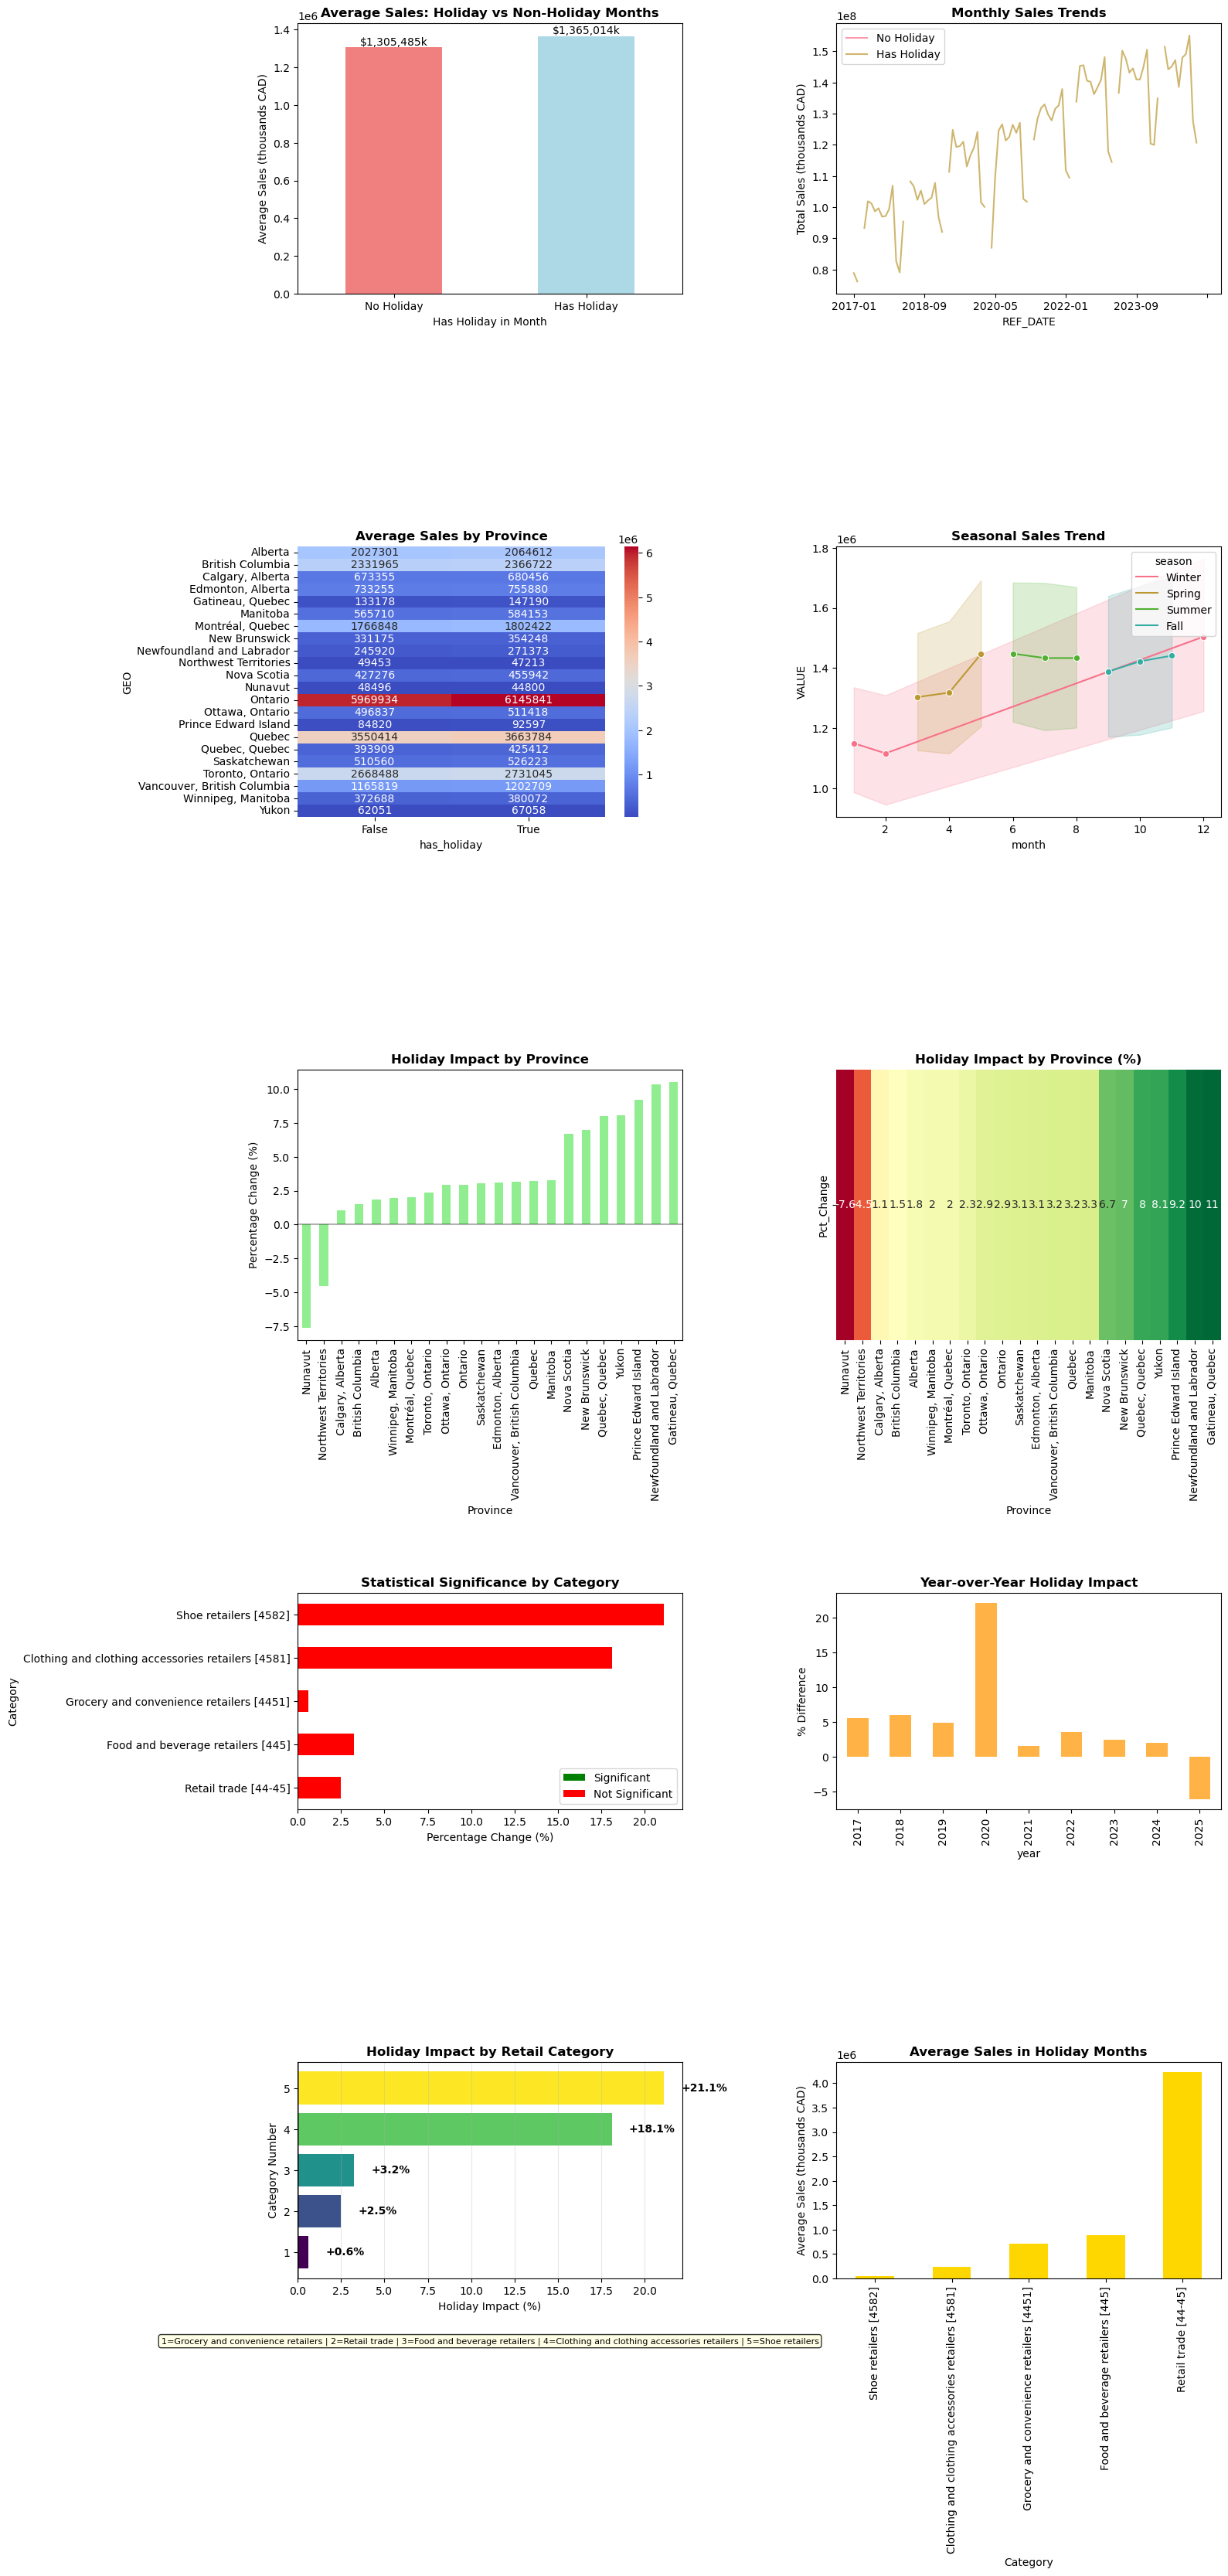


 KEY FINDINGS
 MAIN RESEARCH FINDINGS:
1. Holidays DO NOT have a statistically significant impact on retail sales
2. Overall holiday impact: +4.56% change in sales
3. Statistical confidence: p-value = nan

 CATEGORY INSIGHTS:
• Most positively affected: Shoe retailers [4582] (+21.11%)
• Most negatively affected: Grocery and convenience retailers [4451] (+0.63%)

 PROVINCIAL INSIGHTS:
• Highest holiday impact: Gatineau, Quebec (+10.52%)
• Lowest holiday impact: Nunavut (-7.62%)

 UNIQUE CONTRIBUTIONS OF THIS WORK:
1. First comprehensive analysis of Canadian provincial retail sales vs holidays
2. Multi-dimensional analysis: category, province, and seasonal perspectives
3. Statistical validation of holiday impact using t-tests
4. 8+ years of longitudinal data analysis (2017-2025)
5. Unadjusted data analysis showing real consumer behavior patterns


In [24]:
results, visualization = analyze_my_data(merged_df)